# Assignment 04

#### 1. Data

- load a set of data points $\{ (x^{(i)}, y^{(i)}, z^{(i)}, h^{(i)}) \}$ from the given CSV file ('data_train.csv') for training
- load a set of data points $\{ (x^{(i)}, y^{(i)}, z^{(i)}, h^{(i)}) \}$ from the given CSV file ('data_test.csv') for testing



In [1]:
import numpy as np
import csv
import matplotlib.pyplot as plt


x_train = []
y_train = []
z_train = []
h_train = []

x_test = []
y_test = []
z_test = []
h_test = []

with open('data_train.csv', newline='') as myfile:
    reader  = csv.reader(myfile, delimiter=',')
    ct = 1 
    for i in reader:
        # print('[', ct, ']', 'x =', i[0], ', y = ', i[1], ', z = ', i[2], ', h = ', i[3])
        x_train.append(float(i[0]))
        y_train.append(float(i[1]))
        z_train.append(float(i[2]))
        h_train.append(float(i[3]))
        ct += 1
myfile.close()

with open('data_test.csv', newline='') as myfile:
    reader  = csv.reader(myfile, delimiter=',')
    ct = 1 
    for i in reader:
        # print('[', ct, ']', 'x =', i[0], ', y = ', i[1], ', z = ', i[2], ', h = ', i[3])
        x_test.append(float(i[0]))
        y_test.append(float(i[1]))
        z_test.append(float(i[2]))
        h_test.append(float(i[3]))
        ct += 1
myfile.close()

x_train = np.array(x_train)
y_train = np.array(y_train)
z_train = np.array(z_train)
h_train = np.array(h_train)

x_test = np.array(x_test)
y_test = np.array(y_test)
z_test = np.array(z_test)
h_test = np.array(h_test)

print("Data Loaded!")

Data Loaded!


#### 2. Training and Testing


In [6]:
theta0 = np.random.rand() - 0.5
theta1 = np.random.rand() - 0.5
theta2 = np.random.rand() - 0.5
theta3 = np.random.rand() - 0.5

col_theta0 = []
col_theta1 = []
col_theta2 = []
col_theta3 = []
col_MSE = []
col_MSE_test = []

col_theta0.append(theta0)
col_theta1.append(theta1)
col_theta2.append(theta2)
col_theta3.append(theta3)

m = len(x_test)

alpha = 0.00000001

for ite in range(10000):
    total0 = 0.
    total1 = 0.
    total2 = 0.
    total3 = 0.
    
    for i in range(m):
        total0 += theta0 + theta1*x_train[i] + theta2*y_train[i] + theta3*z_train[i] - h_train[i]
        total1 += (theta0 + theta1*x_train[i] + theta2*y_train[i] + theta3*z_train[i] - h_train[i])*x_train[i]
        total2 += (theta0 + theta1*x_train[i] + theta2*y_train[i] + theta3*z_train[i] - h_train[i])*y_train[i]
        total3 += (theta0 + theta1*x_train[i] + theta2*y_train[i] + theta3*z_train[i] - h_train[i])*z_train[i]
        
    theta0 = theta0 - alpha/m*total0
    theta1 = theta1 - alpha/m*total1
    theta2 = theta2 - alpha/m*total2
    theta3 = theta3 - alpha/m*total3
    
    col_theta0.append(theta0)
    col_theta1.append(theta1)
    col_theta2.append(theta2)
    col_theta3.append(theta3)
    
    
    totalMSE = 0.
    for j in range(m):
        totalMSE += 1/(2*m) * (theta0 + theta1*x_train[j] + theta2*y_train[j] + theta3*z_train[j] - h_train[j])**2
    
    col_MSE.append(totalMSE)
    
    totalMSE_test = 0.  
    for k in range(m):
        totalMSE_test += 1/(2*m) * (theta0 + theta1*x_test[k] + theta2*y_test[k] + theta3*z_test[k] - h_test[k])**2
    
    col_MSE_test.append(totalMSE_test)
    
print('Trained!')

Trained!


#### 3. Plot the estimated parameters using the training dataset


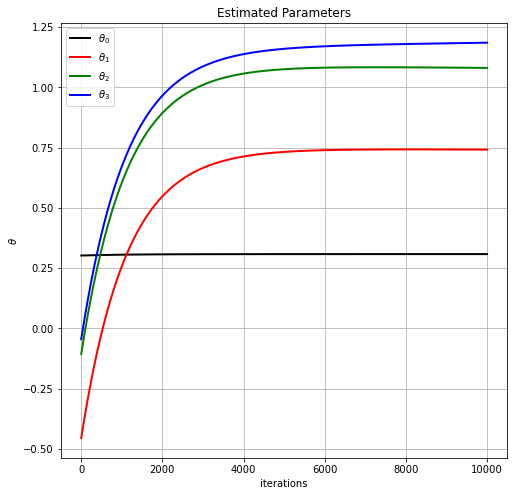

In [3]:

plt.figure(figsize=(8, 8))
plt.plot(col_theta0, 'k-', linewidth=2, markersize=5)
plt.plot(col_theta1, 'r-', linewidth=2, markersize=5)
plt.plot(col_theta2, 'g-', linewidth=2, markersize=5)
plt.plot(col_theta3, 'b-', linewidth=2, markersize=5)
plt.title('Estimated Parameters')
plt.ylabel('$\\theta$')
plt.xlabel('iterations')
plt.grid()
plt.legend(['$\\theta_0$','$\\theta_1$','$\\theta_2$','$\\theta_3$'])

plt.show()

#### 4. Plot the training error using the training dataset


Training error: 665.0199


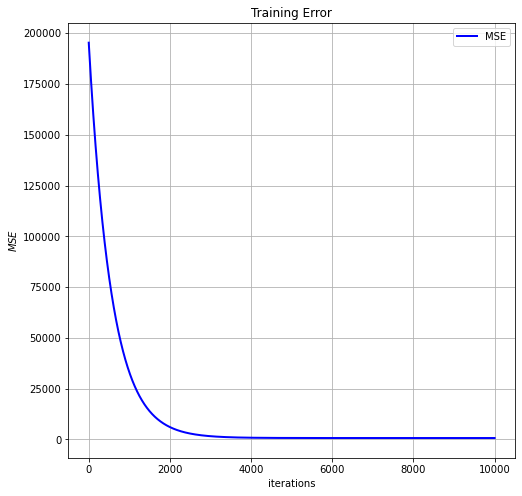

In [4]:
print('Training error: %.4f' % totalMSE)

plt.figure(figsize=(8, 8))
plt.plot(col_MSE, 'b-', linewidth=2, markersize=5)
plt.title('Training Error')
plt.ylabel('$MSE$')
plt.xlabel('iterations')
plt.grid()
plt.legend(['MSE'])

plt.show()

#### 5. Plot the testing error using the testing dataset at every iteration of gradient descent until convergence


Testing error: 722.5077


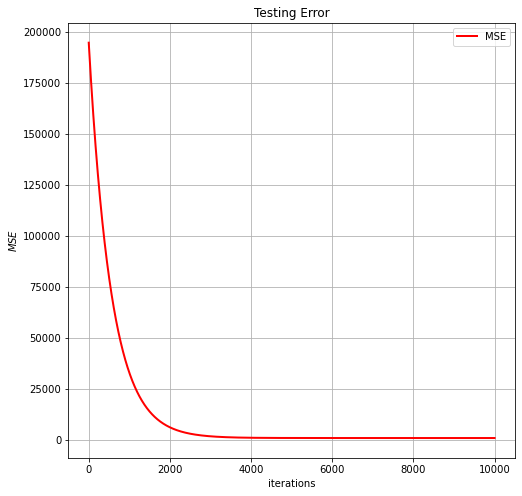

In [5]:
print('Testing error: %.4f' % totalMSE_test)
plt.figure(figsize=(8, 8))
plt.plot(col_MSE_test, 'r-', linewidth=2, markersize=5)
plt.title('Testing Error')
plt.ylabel('$MSE$')
plt.xlabel('iterations')
plt.grid()
plt.legend(['MSE'])
plt.show()


